**Для хранения серий разработчики Pandas не стали брать словарь, а решили создать свой контейнер - DataFrame (датафрейм). Чтобы датафрейм легко ориентировался в сериях, их наделили свойством name.**



In [3]:
import pandas as pd

s1 = pd.Series(['Ivan', 'Andrey', 'Igor'])
s1.name = 'user_names'
df = pd.DataFrame(s1)
df

,user_names
0,Ivan
1,Andrey
2,Igor


In [4]:
df['user_names']

0      Ivan
1    Andrey
2      Igor
Name: user_names, dtype: object

In [6]:
df['user_names'].values

array(['Ivan', 'Andrey', 'Igor'], dtype=object)

In [7]:
s2 = pd.Series([1, 2, 3, 4])

**У серии индексы не уникальные! Они могут повторяться.**

In [8]:
d = {'a': 1, 'b': 2, 'c': 3}
d

{'a': 1, 'b': 2, 'c': 3}

In [9]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s1

a    1
b    2
c    3
dtype: int64

In [10]:
s2 = pd.Series([1, 2, 3], index=['a', 'b', 'a']) 
s2

a    1
b    2
a    3
dtype: int64

In [12]:
s2['a'].values

array([1, 3])

**Датафреймы очень хорошо создаются на основе словаря, который состоит из ключей и значений в качестве вложенных списков. Ключи словаря в датафрейме станут названиями столбцов, а вложенные списки - колонками.**



In [13]:
data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [500,      2000,     1500,     100,     230,     200]}
data

{'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
 'visits': [500, 2000, 1500, 100, 230, 200],
 'year': [2022, 2021, 2020, 2022, 2021, 2020]}

In [14]:
df = pd.DataFrame(data)
df

,city,year,visits
0,Moscow,2022,500
1,Moscow,2021,2000
2,Moscow,2020,1500
3,Kazan,2022,100
4,Kazan,2021,230
5,Kazan,2020,200


In [17]:
df.head(3)

,city,year,visits
0,Moscow,2022,500
1,Moscow,2021,2000
2,Moscow,2020,1500


In [18]:
df.tail(2)

,city,year,visits
4,Kazan,2021,230
5,Kazan,2020,200


In [20]:
df2 = pd.DataFrame(data, columns=['year', 'city', 'visits'])
df2

,year,city,visits
0,2022,Moscow,500
1,2021,Moscow,2000
2,2020,Moscow,1500
3,2022,Kazan,100
4,2021,Kazan,230
5,2020,Kazan,200


In [26]:
df3 = pd.DataFrame(data, columns=['yer', 'city', 'visits'])
df3

,yer,city,visits
0,NaN,Moscow,500
1,NaN,Moscow,2000
2,NaN,Moscow,1500
3,NaN,Kazan,100
4,NaN,Kazan,230
5,NaN,Kazan,200


**При создании датафрейма вы можете задать свои собственные индексы (как и с серией)**

In [35]:
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f'], columns=['city', 'year'])
df

,city,year
a,Moscow,2022
b,Moscow,2021
c,Moscow,2020
d,Kazan,2022
e,Kazan,2021
f,Kazan,2020


In [34]:
df['city']['b']

'Moscow'

**Доступ к целой колонке мы можем получить указав название колонки в квадратных скобках: df['название колонки']. Этот способ разрешает вытягивать колонки с пробелами и спец. символами.**

Менее гибкий способ это обращение к колонки через атрибут(свойство) датафрейма:

    df.column_1
    df.user_name
    df.visits

In [36]:
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f'])
df['city']

a    Moscow
b    Moscow
c    Moscow
d     Kazan
e     Kazan
f     Kazan
Name: city, dtype: object

In [40]:
df.year

a    2022
b    2021
c    2020
d    2022
e    2021
f    2020
Name: year, dtype: int64

**Мы еще будем говорить о том как вытягивать нужные нам строчки, но основной способ это через свойство loc. В квадратных скобках передайте индекс строки, которую надо вытянуть. Датафрейм вернет серию, а не словарь или массив (как может показаться).**

In [42]:
df.loc['c']

city      Moscow
year        2020
visits      1500
Name: c, dtype: object

**Как создать новую колонку? Все очень просто! В квадратных скобках указываем название новой колонки и передаем либо одно значение либо массив.**

Если передаёте массив, то помните, что количество элементов должно быть равно количеству строк в датафрейме. Иначе датафрейм не сможет положить к себе одномерный массив.

In [50]:
import numpy as np 

df['visits'] = np.mean(df['year'])
df

,city,year,visits
a,Moscow,2022,2021.0
b,Moscow,2021,2021.0
c,Moscow,2020,2021.0
d,Kazan,2022,2021.0
e,Kazan,2021,2021.0
f,Kazan,2020,2021.0


In [54]:
df['vistis'] = [1, 2, 3, 4, 5, 6]
df

,city,year,visits,vistis,old_visits
a,Moscow,2022,2021.0,1,20210.0
b,Moscow,2021,2021.0,2,20210.0
c,Moscow,2020,2021.0,3,20210.0
d,Kazan,2022,2021.0,4,20210.0
e,Kazan,2021,2021.0,5,20210.0
f,Kazan,2020,2021.0,6,20210.0


In [52]:
df['old_visits'] = df['visits'] * 10
df

,city,year,visits,vistis,old_visits
a,Moscow,2022,2021.0,1,20210.0
b,Moscow,2021,2021.0,2,20210.0
c,Moscow,2020,2021.0,3,20210.0
d,Kazan,2022,2021.0,4,20210.0
e,Kazan,2021,2021.0,5,20210.0
f,Kazan,2020,2021.0,6,20210.0


**Кстати, можно добавить и серию! Только не забывайте про индексы - они должны совпадать, иначе датафрейм ничего не добавит)**

In [56]:
s1 = pd.Series([1, 10, 20], index=['a', 'd', 'f'])
s1

a     1
d    10
f    20
dtype: int64

In [57]:
df['old_visits'] = s1
df

,city,year,visits,vistis,old_visits
a,Moscow,2022,2021.0,1,1.0
b,Moscow,2021,2021.0,2,NaN
c,Moscow,2020,2021.0,3,NaN
d,Kazan,2022,2021.0,4,10.0
e,Kazan,2021,2021.0,5,NaN
f,Kazan,2020,2021.0,6,20.0


In [65]:
df[df['old_visits'].isna()] = np.round(np.mean(df['old_visits']), 2)
df

,city,year,visits,vistis,old_visits
a,Moscow,2022.000000,2021.000000,1.000000,1.000000
b,10.333333,10.333333,10.333333,10.333333,10.333333
c,10.333333,10.333333,10.333333,10.333333,10.333333
d,Kazan,2022.000000,2021.000000,4.000000,10.000000
e,10.333333,10.333333,10.333333,10.333333,10.333333
f,Kazan,2020.000000,2021.000000,6.000000,20.000000


**На основе словаря создайте датафрейм с индексами user1, user2, user3, user4**



In [73]:
import pandas as pd

def solution():
    data = {'user' : ['Ivan', 'Petr', 'Nikolay', 'Andrey'], 
            'time_per_page' :  [10, 30 , 15, 5], 
             'pages' : [7, 9, 12, 3]}
    return pd.DataFrame(data,  index=['user1', 'user2', 'user3', 'user4'])

data = solution()
data

,user,time_per_page,pages
user1,Ivan,10,7
user2,Petr,30,9
user3,Nikolay,15,12
user4,Andrey,5,3


**На вход функции подаётся датафрейм с прошлого степа. Добавьте в датафрейм новую колонку с названием total_time, и присвойте ей произведение значений из столбцов time_per_page и pages. Функция должна вернуть итоговый датафрейм.**



In [74]:
import pandas as pd

def solution(data):
    data['total_time'] = data['time_per_page'] * data['pages']
    return data

solution(data)

,user,time_per_page,pages,total_time
user1,Ivan,10,7,70
user2,Petr,30,9,270
user3,Nikolay,15,12,180
user4,Andrey,5,3,15


**На вход функции подаётся датафрейм с прошлого степа и серия, которая содержит информацию о балансе пользователя:**

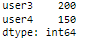

добавьте в датафрейм столбец balance, который будет хранить информацию о балансе из серии.





In [76]:
import pandas as pd

def solution(df, s1):
    df['balance'] = s1
    return df


s1 = pd.Series([200, 150], index=['user3', 'user4'])
solution(data, s1)

,user,time_per_page,pages,total_time,balance
user1,Ivan,10,7,70,NaN
user2,Petr,30,9,270,NaN
user3,Nikolay,15,12,180,200.0
user4,Andrey,5,3,15,150.0


**На вход функции подаётся датафрейм с прошлого степа. Найдите индексы, где баланс не подтянулся. На выходе функция должна вернуть numpy массив состоящий из индексов**

In [80]:
import pandas as pd

def solution(df):
    return df[df['balance'].isna()].index


solution(data)

Index(['user1', 'user2'], dtype='object')

**На вход функции подаётся датафрейм с прошлого степа. Создайте новую колонку c названием is_correct. Проверьте каждое значение из столбца total_time. Если значение меньше 100, то в колонку is_correct вставьте True, а иначе False. Функция должна вернуть датафрейм с внесёнными изменениями.**



In [81]:
import pandas as pd

def solution(df):
    df['is_correct'] = df['total_time'] < 100
    return df

solution(data)

,user,time_per_page,pages,total_time,balance,is_correct
user1,Ivan,10,7,70,NaN,True
user2,Petr,30,9,270,NaN,False
user3,Nikolay,15,12,180,200.0,False
user4,Andrey,5,3,15,150.0,True
